In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

plt.style.use('seaborn')

# Actual Data

In [325]:
X = np.linspace(0,1,data_length)
Y = np.random.randint(25) * X**2 + np.random.randint(25) * X + np.random.randint(25)
noise = np.random.normal(0,1,100) 
actual_data = Y + noise

X_train, X_test, y_train, y_test = train_test_split(X, actual_data,test_size = 0.25)

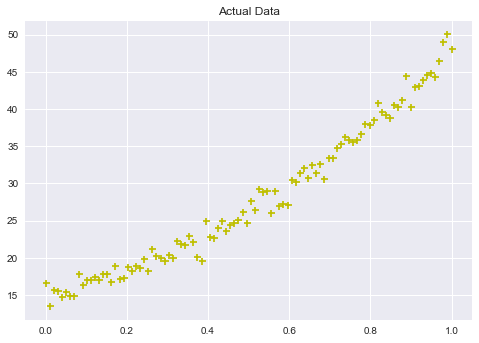

In [326]:
plt.scatter(X, actual_data, marker='+', c='y')
plt.title('Actual Data') 
plt.show()

# Genetic Algorithm Functions

In [327]:
def individual(degree):
    n = degree + 1
    indv = []
    for i in range(n):
        indv.append(np.random.rand())
    return indv

def generate_population(npop, degree, X_train, X_test, y_train, y_test):
    pop = []
    for i in range(npop):
        pop.append(individual(degree))
    pop = pd.DataFrame(pop)
    pop = compute_fitness(pop, degree, X_train, X_test, y_train, y_test)
    return pop

def compute_fitness(pop, degree, X_train, X_test, y_train, y_test):
    npop = len(pop)
    pop['rmse'] = 0    
    for i in range(npop):
        y_train_ = np.polyval(pop.iloc[i][0:degree+1], X_train)
        rmse_train_ = np.sqrt(np.mean((y_train_ - y_train)**2))
        y_test_ = np.polyval(pop.iloc[i][0:degree+1], X_test)
        rmse_test_ = np.sqrt(np.mean((y_test_ - y_test)**2))
        rmse_ = np.mean([rmse_train_, rmse_test_])
        pop.loc[i, 'rmse'] = rmse_
    pop['fitness_val'] = 1/pop['rmse']
    return pop

def selection(pop, degree, elit=0.1):
    npop = len(pop)
    nselected = npop/2
    nelit = round(elit*npop)
    nonelit = int(nselected - nelit)
    selected = []
    
    pop_sorted = pop.sort_values(['fitness_val'], ascending=False)
    for i in range(nelit):
        selected.append(pop_sorted.iloc[i,:])
    
    # Creating roulette partition
    pop['fitness prob'] = pop['fitness_val']/sum(pop['fitness_val'])
    pop['fitness prob cumsum'] = pop['fitness prob'].cumsum()
    
    # Selecting individuals
    for i in range(nonelit):
        randomnum = random.random()
        for i in range(1, len(pop)):
            if randomnum < pop['fitness prob cumsum'][0]:
                selected.append(pop.iloc[0,:])
                break
            elif (randomnum > pop['fitness prob cumsum'][i-1]) and (randomnum < pop['fitness prob cumsum'][i]):
                selected.append(pop.iloc[i,:])
                break
    selected = pd.DataFrame(selected)
    pop = pop.drop(['fitness prob', 'fitness prob cumsum'], axis=1)
    selected = selected.drop(['fitness prob', 'fitness prob cumsum'], axis=1)
    selected = selected.sample(frac=1).reset_index(drop=True)     # Shuffle the dataframe
    return selected

def crossover(selected, degree, crossrate, elit=0.1):
    npop = 2*len(selected)
    nselected = len(selected)
    nelit = round(elit*npop)
    nonelit = int(npop - nelit)    
    new_gen = []
    
    selected_sorted = selected.sort_values(['fitness_val'], ascending=False)
    for i in range(nelit):
        new_gen.append(np.asarray(selected.iloc[i,0:degree+1]))
    
    
    for i in range(nonelit):
        parentA = selected.iloc[np.random.randint(nselected), 0:degree+1]
        parentB = selected.iloc[np.random.randint(nselected), 0:degree+1]
        cross_points = np.random.rand(1, degree+1) < crossrate
        child = np.where(cross_points, parentA, parentB)
        new_gen.append(child[0])
    new_gen = pd.DataFrame(new_gen)
    new_gen = new_gen.sample(frac=1).reset_index(drop=True)    # Shuffle the dataframe
    return new_gen

def mutation(new_gen, degree, mutation_rate):
    npop = len(new_gen)
    for i in range(npop):
        mutation_points = np.random.rand(1,degree+1) < mutation_rate
        for j in range(degree+1):
            if mutation_points[0][j] == True:
                new_gen.iloc[i,j] = new_gen.iloc[i,j] + (-1)**i * np.random.rand() * 1e01
    mutated = new_gen
    return mutated

# Main

In [328]:
npop = 100
ngen = 50
degree = 5
crossrate = 0.5
mutation_rate = 0.1

# Set empty variable
rmse_history = []
param_history = []

# Generate initial population
initial_pop = generate_population(npop, degree, X_train, X_test, y_train, y_test)
pop = initial_pop

for i in range(ngen):
    selected = selection(pop, degree)
    new_gen = crossover(selected, degree, crossrate)
    mutated = mutation(new_gen, degree, mutation_rate)
    pop = compute_fitness(mutated, degree, X_train, X_test, y_train, y_test)
    
    idx_max = pop['fitness_val'].idxmax()
    rmse_history.append(pop.loc[idx_max, 'rmse'])
    param_history.append(pop.iloc[idx_max,:])
    print(f'Generation {i+1}')

Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50


Text(0, 0.5, 'RMSE')

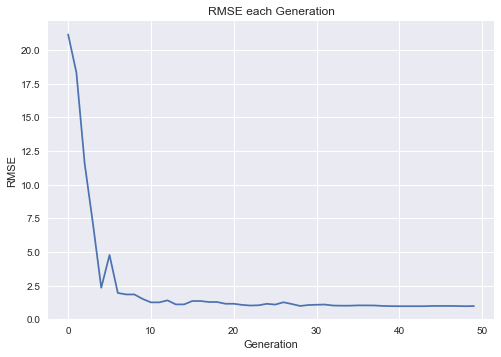

In [329]:
fig, ax = plt.subplots()
ax.plot(rmse_history)
plt.title('RMSE each Generation')
plt.xlabel('Generation')
plt.ylabel('RMSE')

In [330]:
param_history[-1]

0               4.432803
1              -6.096640
2              12.854326
3               5.692669
4              16.795298
5              14.823922
rmse            0.990712
fitness_val     1.009375
Name: 99, dtype: float64

In [331]:
p = param_history[-1][0:degree+1]
y = np.polyval(p, np.linspace(0,1,data_length))

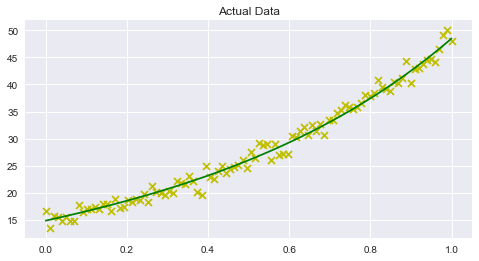

In [332]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(np.linspace(0,1,data_length), actual_data, c='y', marker='x', label='Actual')
plt.plot(np.linspace(0,1,data_length), y, label='Prediction', color='green')
plt.title('Actual Data')
plt.show()